# Case2-1: DatetimeIndexを使ってみる
---

In [30]:
%matplotlib inline
import seaborn as sns
import datetime
import numpy as np
import pandas as pd

In [31]:
# pandasの表示行数を設定
pd.options.display.max_rows = 10

## pandas.date_rangeで日付範囲データを作成

In [32]:
date_range = pd.date_range('2015-1-1', '2016-12-31', freq='B')

In [33]:
date_range

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=522, freq='B')

### freqのパラメータ  

|文字                 |オフセットクラス  |説明                                                  |
|:--------------------|:-----------------|:-----------------------------------------------------|
|D                    |Day               |暦通りの日次                                          |
|B                    |BusinessDay       |毎営業日                                              |
|H                    |Hour              |毎時                                                  |
|Tまたはmin           |Minute            |毎分                                                  |
|S                    |Second            |毎秒                                                  |
|Lまたはms            |Milli             |毎ミリ秒                                              |
|U                    |Micro             |毎マイクロ秒                                          |
|M                    |MonthEnd          |暦通りの月末毎                                        |
|BM                   |BusinessMonthEnd  |月の最終営業日毎                                      |
|MS                   |MonthBegin        |暦通りの月初毎                                        |
|BMS                  |BusinessMonthBegin|月の営業開始日毎                                      |
|W-MON,W-TUE,...      |Week              |毎週指定した曜日毎                                    |
|WOM-1MON,WOM-2MON,...|WeekOfMonth       |月の1～4週目の指定した曜日毎                          |
|Q-JAN,Q-FEB,...      |QuarterEnd        |指定した月に年度が変わる前提で、四半期の暦通りの月末毎|
|BQ-JAN,BQ-FEB,...    |BusinessQuarterEnd|指定した月に年度が変わる前提で、四半期の最終営業日毎  |
|QS-JAN,QS-FEB,...    |QuarterBegin      |指定した月に年度が変わる前提で、四半期の暦通りの月初毎|
|BQS-JAN,BQS-FEB,...  |QuarterBegin      |指定した月に年度が変わる前提で、四半期の営業開始日毎  |
|A-JAN,A-FEB,...      |YearEnd           |1年に1度、指定した月の暦通りの月末毎                  |
|BA-JAN,BA-FEB,...    |BusinessYearEnd   |1年に1度、指定した月の最終営業日毎                    |
|AS-JAN,AS-FEB,...    |YearBegin         |1年に1度、指定した月の暦通りの月初毎                  |
|BAS-JAN,BAS-FEB,...  |YearBegin         |1年に1度、指定した月の営業開始日毎                    |

[Case1-3](Case1-3.ipynb)と同様に次の確率微分方程式にしたがう確率過程 Stを求める([幾何ブラウン運動](https://ja.wikipedia.org/wiki/幾何ブラウン運動 "Wikipedia"))  
$$dS_t = \mu S_t\,dt + \sigma S_t\,dB_t$$
今回は日毎にデータを変化させていく

In [34]:
def generate_stock_price(S0, t, r, sigma, path, steps):
    dt = float(t) / steps
    w = np.cumsum(np.reshape(np.random.standard_normal(path * steps), (path, steps)), 1) * (np.sqrt(dt))
    t = np.cumsum(np.ones((path, steps)), 1) * dt   
    return S0 * np.exp((r - 0.5 * np.power(sigma, 2)) * t + sigma * w)

In [35]:
days = len(date_range)
stock_price = generate_stock_price(1000, days / 365.0, 0.001, 0.2, 3, days)
df = pd.DataFrame(stock_price.T, index=date_range, columns=['price1', 'price2', 'price3'])

In [36]:
df.head()

,price1,price2,price3
2015-01-01,1001.986297,1010.284327,984.626584
2015-01-02,985.859812,1019.855390,1003.991545
2015-01-05,971.348074,1013.337638,1005.082109
2015-01-06,966.951961,1012.065025,1008.944978
2015-01-07,975.070556,1016.426021,999.595205


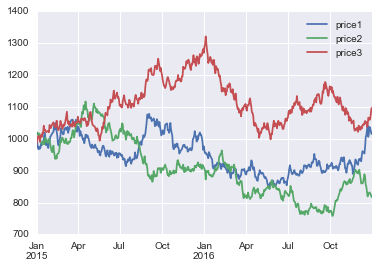

In [37]:
df.plot()

## datetime.date型で参照

In [38]:
df.loc[datetime.date(2016, 1, 1)]

price1     962.669130
price2     906.104087
price3    1288.619603
Name: 2016-01-01 00:00:00, dtype: float64

## datetime.datetime型で参照

In [39]:
df.loc[datetime.datetime(2016, 1, 1)]

price1     962.669130
price2     906.104087
price3    1288.619603
Name: 2016-01-01 00:00:00, dtype: float64

## str型で参照

In [40]:
df.loc['2016/1/1']

price1     962.669130
price2     906.104087
price3    1288.619603
Name: 2016-01-01 00:00:00, dtype: float64

In [41]:
df.loc['20160101']

price1     962.669130
price2     906.104087
price3    1288.619603
Name: 2016-01-01 00:00:00, dtype: float64

In [42]:
df.loc['Jan 01, 2016']

price1     962.669130
price2     906.104087
price3    1288.619603
Name: 2016-01-01 00:00:00, dtype: float64

## 年でスライス

In [43]:
df.loc['2016':].head()

,price1,price2,price3
2016-01-01,962.669130,906.104087,1288.619603
2016-01-04,954.732071,899.142614,1294.928149
2016-01-05,953.386341,872.398471,1320.877688
2016-01-06,954.855967,898.713163,1298.070114
2016-01-07,949.250614,894.920447,1279.576812


## 月でスライス

In [44]:
df.loc['2015-5'].head()

,price1,price2,price3
2015-05-01,981.722125,1060.829235,1052.096227
2015-05-04,978.932719,1076.242850,1043.481328
2015-05-05,971.127689,1095.724766,1041.635060
2015-05-06,975.725451,1110.442598,1039.745143
2015-05-07,971.693684,1102.250021,1038.702108


In [45]:
df.loc['2015-12':'2016-01']

,price1,price2,price3
2015-12-01,966.286338,898.841293,1230.877763
2015-12-02,970.860557,902.354652,1221.094154
2015-12-03,964.816665,896.747886,1215.334564
2015-12-04,963.688257,901.265408,1235.356666
2015-12-07,971.087418,905.246729,1232.976556
...,...,...,...
2016-01-25,916.800479,899.423313,1218.158618
2016-01-26,906.860148,910.270047,1205.339786
2016-01-27,918.045539,899.918835,1227.858712
2016-01-28,918.510109,902.926637,1222.551561


## インデックスに含まれていないタイムスタンプを範囲に含めることもできる

In [46]:
df.loc['2016-01-02':'2016-01-10']

,price1,price2,price3
2016-01-04,954.732071,899.142614,1294.928149
2016-01-05,953.386341,872.398471,1320.877688
2016-01-06,954.855967,898.713163,1298.070114
2016-01-07,949.250614,894.920447,1279.576812
2016-01-08,947.600444,897.714045,1264.694257


## datetime.time型で参照

In [47]:
# 1時間頻度のデータを100個作成
ser = pd.Series(generate_stock_price(100, 0.2, 0, 0.2, 100, 1).T[0],
               index=pd.date_range('2016-01-01', periods=100, freq='H'))

In [48]:
ser.head()

2016-01-01 00:00:00     94.615663
2016-01-01 01:00:00    101.019134
2016-01-01 02:00:00     99.712458
2016-01-01 03:00:00    103.307695
2016-01-01 04:00:00     91.217281
Freq: H, dtype: float64

### datetime.timeで参照すると指定した時刻を抜き出すことができる

In [49]:
ser[datetime.time(9, 0)]

2016-01-01 09:00:00    112.509958
2016-01-02 09:00:00    106.277985
2016-01-03 09:00:00    102.816285
2016-01-04 09:00:00     82.912921
Freq: 24H, dtype: float64

### 内部では.at_time()メソッドが動作している

In [50]:
ser.at_time(datetime.time(9, 0))

2016-01-01 09:00:00    112.509958
2016-01-02 09:00:00    106.277985
2016-01-03 09:00:00    102.816285
2016-01-04 09:00:00     82.912921
Freq: 24H, dtype: float64

### .between_time()メソッドを使うと、時刻の範囲を指定できる

In [51]:
ser.between_time(datetime.time(9, 0), datetime.time(12, 0))

2016-01-01 09:00:00    112.509958
2016-01-01 10:00:00    101.140886
2016-01-01 11:00:00     87.446858
2016-01-01 12:00:00    109.157271
2016-01-02 09:00:00    106.277985
                          ...    
2016-01-03 12:00:00    103.503862
2016-01-04 09:00:00     82.912921
2016-01-04 10:00:00     98.854999
2016-01-04 11:00:00    110.028523
2016-01-04 12:00:00    108.376573
dtype: float64

# Case2-2: 四本値を作成、範囲を変換
---

## .resample()メソッドを使って月足に変換

In [52]:
df['price1'].resample('M').ohlc()

,open,high,low,close
2015-01-31,1001.986297,1018.922534,966.951961,1006.589074
2015-02-28,1008.180142,1048.923425,978.924985,1013.558120
2015-03-31,1014.498947,1059.981738,1014.498947,1021.730032
2015-04-30,1037.939397,1037.939397,971.140629,971.140629
2015-05-31,981.722125,981.722125,947.484479,962.249187
...,...,...,...,...
2016-08-31,896.280304,952.424363,891.787996,936.649680
2016-09-30,935.431969,935.431969,892.034835,914.854900
2016-10-31,914.456067,941.053802,900.699948,934.165120
2016-11-30,942.303887,942.303887,889.384129,921.059061


## 既にある四本値のデータを変換してみる

### [Yahoo Finance](https://finance.yahoo.com "yahoo finance")からS&P指数の四本値を取ってくる

In [53]:
from pandas_datareader import data
try:
    gspc = data.DataReader("^GSPC", 'yahoo', datetime.datetime(2006, 1, 1), datetime.datetime(2015, 12, 31))
except Exception:
    gspc = pd.read_msgpack('data/^GSPC.mpack')

In [54]:
gspc.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,1248.290039,1270.219971,1245.739990,1268.800049,2554570000,1268.800049
2006-01-04,1268.800049,1275.369995,1267.739990,1273.459961,2515330000,1273.459961
2006-01-05,1273.459961,1276.910034,1270.300049,1273.479980,2433340000,1273.479980
2006-01-06,1273.479980,1286.089966,1273.479980,1285.449951,2446560000,1285.449951
2006-01-09,1285.449951,1290.780029,1284.819946,1290.150024,2301490000,1290.150024


### 普通にresample().ohlc()を実行すると・・・

In [55]:
gspc.resample('W').ohlc().head()

Open                                                High  \
                   open         high          low        close         open   
Date                                                                          
2006-01-08  1248.290039  1273.479980  1248.290039  1273.479980  1270.219971   
2006-01-15  1285.449951  1294.180054  1285.449951  1286.060059  1290.780029   
2006-01-22  1287.609985  1287.609985  1277.930054  1285.040039  1287.609985   
2006-01-29  1261.489990  1273.829956  1261.489990  1273.829956  1268.189941   
2006-02-05  1283.719971  1285.199951  1270.839966  1270.839966  1287.939941   

                                                           Low               \
                   high          low        close         open         high   
Date                                                                          
2006-01-08  1286.089966  1270.219971  1286.089966  1245.739990  1273.479980   
2006-01-15  1294.900024  1288.959961  1288.959961  1284.819946  1288.119995   
2006-01-22  1287.790039  1282.930054  1285.040039  1278.609985  1278.609985   
2006-01-29  1286.380005  1268.189941  1286.380005  1261.489990  1273.829956   
2006-02-05  1287.939941  1270.869995  1270.869995  1283.510010  1283.510010   

               ...             Close                   Volume              \
               ...               low        close        open        high   
Date           ...                                                          
2006-01-08     ...       1268.800049  1285.449951  2554570000  2554570000   
2006-01-15     ...       1286.060059  1287.609985  2301490000  2406130000   
2006-01-22     ...       1261.489990  1261.489990  2179970000  2845810000   
2006-01-29     ...       1263.819946  1283.719971  2256070000  2856780000   
2006-02-05     ...       1264.030029  1264.030029  2282730000  2708310000   

                                      Adj Close                            \
                   low       close         open         high          low   
Date                                                                        
2006-01-08  2433340000  2446560000  1268.800049  1285.449951  1268.800049   
2006-01-15  2206510000  2206510000  1290.150024  1294.180054  1286.060059   
2006-01-22  2179970000  2845810000  1282.930054  1285.040039  1261.489990   
2006-01-29  2256070000  2623620000  1263.819946  1283.719971  1263.819946   
2006-02-05  2282210000  2282210000  1285.189941  1285.189941  1264.030029   

                         
                  close  
Date                     
2006-01-08  1285.449951  
2006-01-15  1287.609985  
2006-01-22  1261.489990  
2006-01-29  1283.719971  
2006-02-05  1264.030029  

[5 rows x 24 columns]

### 各列毎のohlcを集計してしまうので、四本値毎の集計した値から必要な値を持ってくる

In [56]:
gspc_weekly_ohlc = gspc.resample('W').ohlc()[[('Open', 'open'), ('High', 'high'), ('Low', 'low'), ('Close', 'close')]]
gspc_weekly_ohlc.columns = gspc_weekly_ohlc.columns.droplevel()

In [57]:
gspc_weekly_ohlc.head()

,open,high,low,close
Date,,,,
2006-01-08,1248.290039,1286.089966,1245.739990,1285.449951
2006-01-15,1285.449951,1294.900024,1282.780029,1287.609985
2006-01-22,1287.609985,1287.790039,1260.920044,1261.489990
2006-01-29,1261.489990,1286.380005,1259.420044,1283.719971
2006-02-05,1283.719971,1287.939941,1261.020020,1264.030029


## 番外編: HighChartsでローソク足を表示してみる

### Python3の場合
python-highchartsはPython3に対応していないので、forkしたリポジトリからインストール  
  
`git clone -b issue37-Python3 https://github.com/JrtPec/python-highcharts.git
cd python-highcharts
python setup.py install`

In [58]:
import charts
gspc['Time'] = gspc.index.astype(np.int64)//1000000
series = [{'type':'candlestick',
           'name':'candle',
           'data':gspc[['Time', 'Open', 'High', 'Low', 'Close']].values}]

options = {'rangeSelector':{'selected':0},
           'xAxis':{'gridLineWidth':1, 'gridLineDashStyle':'Dot'},
           'yAxis':{'gridLineWidth':1, 'gridLineDashStyle':'Dot'}}

charts.plot(series, stock=True, show='inline', options=options, display=['candle'])